In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
import pickle
from sklearn.externals import joblib
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import os 

   S3D-IO    50-50-100-2-2-4-1  526.27  0.03   0.06   66.03   0.15   2.31  \
0  S3D-IO  100-200-400-2-4-4-1  607.03  0.95   1.61  494.63   2.86   5.92   
1  S3D-IO  200-200-400-2-2-4-1  606.73  1.91   3.22  753.38   5.72   7.78   
2  S3D-IO  200-200-400-4-4-4-1  971.61  1.91   2.01  660.25   5.72   8.87   
3  S3D-IO   50-100-100-2-2-4-1  450.85  0.06   0.14  364.87   0.30   0.84   
4  S3D-IO  400-400-400-2-2-4-1  444.27  7.63  17.59  729.23  22.89  32.14   

   0.05  0.01    196608  12   enable enable.1 enable.2  disable  478150656  
0  0.05  0.08  32768000   1   enable  disable   enable  disable  235929600  
1  0.04  0.19   1048576   3   enable  disable   enable  disable  423624704  
2  0.73  0.14  19529728   2  disable  disable   enable   enable  515899392  
3  0.08  0.03   1048576   1   enable  disable  disable   enable  348127232  
4  0.04  0.41     65536  23   enable   enable   enable  disable  480247808  


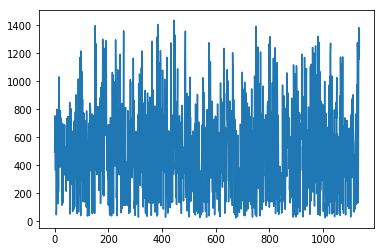

In [9]:
projectdir = "/home/dsinghvi/sem8/parallel/project/CS633-2018-19-2-project/progress/"
data = pd.read_csv('../S3DIOstats.txt', delim_whitespace=True)
data = data.sample(frac=1).reset_index(drop=True)
print(data.head(5))
data.iloc[:,5].plot()

In [10]:
array = data.values

print(data.head())
print(data.shape)
data.columns=['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14','col15','col16','col17']
z = data['col2'].str.split('-')
print(z.head())
data['col13']=data['col13'].eq("enable").mul(1)
data['col14']=data['col14'].eq("enable").mul(1)
data['col15']=data['col15'].eq("enable").mul(1)
data['col16']=data['col16'].eq("enable").mul(1)

   S3D-IO    50-50-100-2-2-4-1  526.27  0.03   0.06   66.03   0.15   2.31  \
0  S3D-IO  100-200-400-2-4-4-1  607.03  0.95   1.61  494.63   2.86   5.92   
1  S3D-IO  200-200-400-2-2-4-1  606.73  1.91   3.22  753.38   5.72   7.78   
2  S3D-IO  200-200-400-4-4-4-1  971.61  1.91   2.01  660.25   5.72   8.87   
3  S3D-IO   50-100-100-2-2-4-1  450.85  0.06   0.14  364.87   0.30   0.84   
4  S3D-IO  400-400-400-2-2-4-1  444.27  7.63  17.59  729.23  22.89  32.14   

   0.05  0.01    196608  12   enable enable.1 enable.2  disable  478150656  
0  0.05  0.08  32768000   1   enable  disable   enable  disable  235929600  
1  0.04  0.19   1048576   3   enable  disable   enable  disable  423624704  
2  0.73  0.14  19529728   2  disable  disable   enable   enable  515899392  
3  0.08  0.03   1048576   1   enable  disable  disable   enable  348127232  
4  0.04  0.41     65536  23   enable   enable   enable  disable  480247808  
(1135, 17)
0    [100, 200, 400, 2, 4, 4, 1]
1    [200, 200, 400, 2, 2, 4, 1

In [11]:
X = pd.DataFrame(z.tolist())
X = X.drop(6, 1)

#FEATURES
X['cb3']=data['col13']
X['cb4']=data['col14']
#X['cb5']=data['col15']
#X['cb6']=data['col16']
X['cb1']=data['col11']
X['cb2']=data['col12']
X['cb7']=data['col17']
X['ratio1'] = X.iloc[:,0].astype(int)/(X.iloc[:,3].astype(int))
X['ratio2'] = X.iloc[:,1].astype(int)/(X.iloc[:,4].astype(int))
X['ratio3'] = X.iloc[:,2].astype(int)/(X.iloc[:,5].astype(int))

#NORMALIZING 
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(X_scaled)

print(type(X))
print(X.head())
X_total = X
#pd.options.display.max_rows=  1500


<class 'pandas.core.frame.DataFrame'>
         0         1         2    3    4         5    6    7         8   \
0  0.142857  0.428571  0.466667  0.0  1.0  0.333333  1.0  0.0  0.027366   
1  0.428571  0.428571  0.466667  0.0  0.0  0.333333  1.0  0.0  0.000876   
2  0.428571  0.428571  0.466667  1.0  1.0  0.333333  0.0  0.0  0.016310   
3  0.000000  0.142857  0.066667  0.0  0.0  0.333333  1.0  0.0  0.000876   
4  1.000000  1.000000  0.466667  0.0  0.0  0.333333  1.0  1.0  0.000055   

         9         10        11        12        13  
0  0.002062  0.219823  0.142857  0.142857  0.428571  
1  0.006186  0.395486  0.428571  0.428571  0.428571  
2  0.004124  0.481845  0.142857  0.142857  0.428571  
3  0.002062  0.324828  0.000000  0.142857  0.000000  
4  0.047423  0.448479  1.000000  1.000000  0.428571  


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
Y = data['col6']
#Y = ((data['col7'])*1024)/data['col6'] + (data['col4']*1024)/data['col3']
Y=Y.values
Y = Y.astype(int)
print(Y[0:5])
import xgboost as xgb
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_total,Y,test_size=0.7,random_state = 42) 
y = train_Y
X = train_X
print(X[0:5])
print(y.shape, X.shape)
print(test_X.shape,test_Y.shape)
print(y[0:5])



[494 753 660 364 729]
           0         1         2    3    4         5    6    7         8   \
480  0.000000  0.000000  0.066667  0.0  0.0  0.333333  1.0  0.0  0.000766   
283  0.000000  0.142857  0.066667  0.0  0.0  0.333333  0.0  1.0  0.000876   
902  0.142857  0.428571  0.200000  0.0  1.0  0.333333  0.0  0.0  0.000055   
991  0.000000  0.000000  0.066667  0.0  0.0  0.333333  0.0  1.0  0.000055   
824  0.000000  0.142857  0.066667  0.0  0.0  0.333333  1.0  1.0  0.000000   

           9         10        11        12        13  
480  0.037113  0.815505  0.000000  0.000000  0.000000  
283  0.028866  0.052993  0.000000  0.142857  0.000000  
902  0.016495  0.399411  0.142857  0.142857  0.142857  
991  0.008247  0.383710  0.000000  0.000000  0.000000  
824  0.012371  0.057900  0.000000  0.142857  0.000000  
(340,) (340, 14)
(795, 14) (795,)
[144 348 859 221 234]


In [13]:
xgb_model =xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X, y)
y_pred = xgb_model.predict(test_X)

mse=mean_squared_error(test_Y, y_pred)
print(np.sqrt(mse))

125.23915305057011


In [14]:
#print(test_Y)
from sklearn.metrics import r2_score
r2_score(test_Y,y_pred)

0.8487557156901177

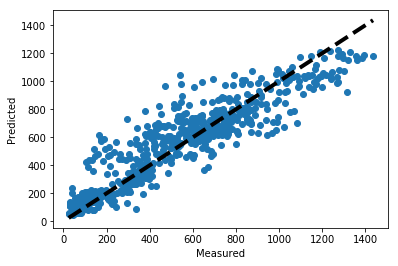

In [15]:
fig, ax = plt.subplots()
ax.scatter(test_Y, y_pred)
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.savefig("xgbs3dresult.png")
plt.show()

In [28]:
# save the model to disk

modelfile = 'finalxgb.sav'
joblib.dump(xgb_model, open(modelfile, 'wb'))
scaler_filename = "scalerxgb.save"
joblib.dump(min_max_scaler, scaler_filename) 


['scalerxgb.save']

In [19]:
# ##### TESTING CODE FOR THIS MODEL


# import json
# with open(projectdir+'confex.json') as f:
#     data = json.load(f)

# romio_ds_read = data["mpi"]["romio_ds_read"] == "enable"
# romio_ds_write = data["mpi"]["romio_ds_write"] == "enable"
# romio_cb_read = data["mpi"]["romio_cb_read"]
# romio_cb_write = data["mpi"]["romio_cb_write"]
# cb_buffer_size = data["mpi"]["cb_buffer_size"]
# stripe_size = data["lfs"]["setstripe"]["size"]
# stripe_count = data["lfs"]["setstripe"]["count"]

# col_names =  ['cb5','cb6','cb7','cb8','cb8','cb10','cb11','cb12']
# cb_df  = pd.DataFrame(columns = col_names)
# cb_df.loc[len(cb_df)] = [romio_ds_read,romio_ds_write,stripe_size, stripe_count, cb_buffer_size,"50","50","50"]


# scaler_filename = "scalerxgb.save"
# scaler = joblib.load(scaler_filename)
# xgb_model = joblib.load(modelfile)

# print(test_X.head(1))


# col_names =  ['f0','1', '2','3','4','5']
# my_df = pd.DataFrame(columns=col_names)
# my_df.loc[len(my_df)] = [100,100,100,2,2,4]

# x = pd.concat([my_df,cb_df], axis=1)
# norm_df = pd.DataFrame(scaler.transform(x))
# print(norm_df)

# xgb_model.predict(norm_df)
# x
# test_X.head(1)
# trees.predict(test_X.head(1))